<a href="https://colab.research.google.com/github/astrrr/quant-lab/blob/main/lab_py_fin_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")

# Fetching data and add percentage change

In [33]:
df = yf.download('^DJI', interval='15m', start="2023-09-13", end="2023-11-09")

[*********************100%%**********************]  1 of 1 completed


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1066 entries, 2023-09-13 09:30:00 to 2023-11-08 15:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1066 non-null   float64
 1   High       1066 non-null   float64
 2   Low        1066 non-null   float64
 3   Close      1066 non-null   float64
 4   Adj Close  1066 non-null   float64
 5   Volume     1066 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.3 KB


In [35]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-08 14:45:00,34074.261719,34077.679688,34052.640625,34055.539062,34055.539062,7293233
2023-11-08 15:00:00,34055.640625,34080.628906,34054.511719,34076.230469,34076.230469,7886452
2023-11-08 15:15:00,34075.550781,34093.628906,34075.550781,34082.718750,34082.718750,7186590
2023-11-08 15:30:00,34083.121094,34145.558594,34069.160156,34136.050781,34136.050781,11767389
2023-11-08 15:45:00,34134.339844,34138.519531,34103.648438,34115.160156,34115.160156,29726099


In [36]:
df["Rets"] = df["Close"].pct_change()

In [37]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Rets
Datetime,,,,,,,
2023-11-08 14:45:00,34074.261719,34077.679688,34052.640625,34055.539062,34055.539062,7293233,-0.000546
2023-11-08 15:00:00,34055.640625,34080.628906,34054.511719,34076.230469,34076.230469,7886452,0.000608
2023-11-08 15:15:00,34075.550781,34093.628906,34075.550781,34082.718750,34082.718750,7186590,0.000190
2023-11-08 15:30:00,34083.121094,34145.558594,34069.160156,34136.050781,34136.050781,11767389,0.001565
2023-11-08 15:45:00,34134.339844,34138.519531,34103.648438,34115.160156,34115.160156,29726099,-0.000612


# Preprocessing data

In [38]:
df_outlier =  df["Rets"].rolling(16).agg(["mean", "std"])
df_outlier.tail()

,mean,std
Datetime,,
2023-11-08 14:45:00,-0.000165,0.000648
2023-11-08 15:00:00,-0.000144,0.000669
2023-11-08 15:15:00,-0.000079,0.000646
2023-11-08 15:30:00,0.000026,0.000765
2023-11-08 15:45:00,0.000067,0.000706


In [39]:
df_outliers = df.join(df_outlier)

In [40]:
df_outliers.head()

,Open,High,Low,Close,Adj Close,Volume,Rets,mean,std
Datetime,,,,,,,,,
2023-09-13 09:30:00,34667.281250,34767.109375,34654.910156,34683.699219,34683.699219,9320453,NaN,NaN,NaN
2023-09-13 09:45:00,34683.539062,34732.128906,34670.308594,34731.039062,34731.039062,12525303,0.001365,NaN,NaN
2023-09-13 10:00:00,34733.320312,34738.699219,34638.078125,34638.238281,34638.238281,10675841,-0.002672,NaN,NaN
2023-09-13 10:15:00,34637.500000,34638.878906,34598.750000,34635.160156,34635.160156,11213293,-0.000089,NaN,NaN
2023-09-13 10:30:00,34635.320312,34704.148438,34634.109375,34686.121094,34686.121094,8685308,0.001471,NaN,NaN


In [41]:
df_outliers.tail()

,Open,High,Low,Close,Adj Close,Volume,Rets,mean,std
Datetime,,,,,,,,,
2023-11-08 14:45:00,34074.261719,34077.679688,34052.640625,34055.539062,34055.539062,7293233,-0.000546,-0.000165,0.000648
2023-11-08 15:00:00,34055.640625,34080.628906,34054.511719,34076.230469,34076.230469,7886452,0.000608,-0.000144,0.000669
2023-11-08 15:15:00,34075.550781,34093.628906,34075.550781,34082.718750,34082.718750,7186590,0.000190,-0.000079,0.000646
2023-11-08 15:30:00,34083.121094,34145.558594,34069.160156,34136.050781,34136.050781,11767389,0.001565,0.000026,0.000765
2023-11-08 15:45:00,34134.339844,34138.519531,34103.648438,34115.160156,34115.160156,29726099,-0.000612,0.000067,0.000706


# Detecting outlier

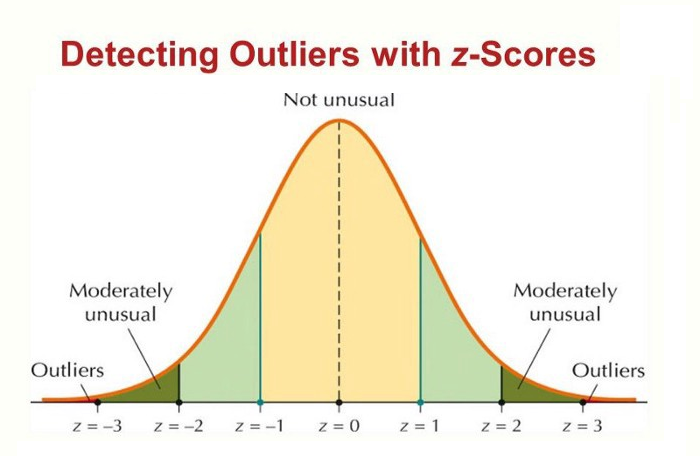

In [42]:
def outlier_detection(df, n_sigmas = 3):
  x = df["Rets"]
  mu = df["mean"]
  sigma = df["std"]

  return x > (mu + (sigma * n_sigmas)) or x < (mu - (sigma * n_sigmas))

In [43]:
ol = df_outliers.apply(outlier_detection, axis=1)

In [44]:
df_outliers['outlier'] = ol

In [60]:
con = df_outliers['outlier'] == True
outliers = df_outliers[con]

In [61]:
outliers

,Open,High,Low,Close,Adj Close,Volume,Rets,mean,std,outlier
Datetime,,,,,,,,,,
2023-09-19 09:30:00,34571.839844,34597.558594,34544.281250,34557.628906,34557.628906,9297800,-0.001882,-0.000240,0.000546,True
2023-10-06 09:30:00,33040.699219,33066.511719,32915.550781,32952.421875,32952.421875,11479015,-0.005008,-0.000107,0.001587,True
2023-10-23 09:30:00,32993.019531,33002.871094,32892.191406,32913.769531,32913.769531,12545976,-0.006310,-0.000607,0.001828,True
2023-10-30 09:30:00,32537.539062,32726.939453,32537.539062,32707.740234,32707.740234,11827939,0.008806,0.000166,0.002786,True
2023-11-03 09:30:00,33988.828125,34038.578125,33978.628906,34016.718750,34016.718750,11944376,0.005211,0.000705,0.001337,True


In [62]:
df_outliers[con].shape

(5, 10)

In [63]:
df_outliers.shape

(1066, 10)

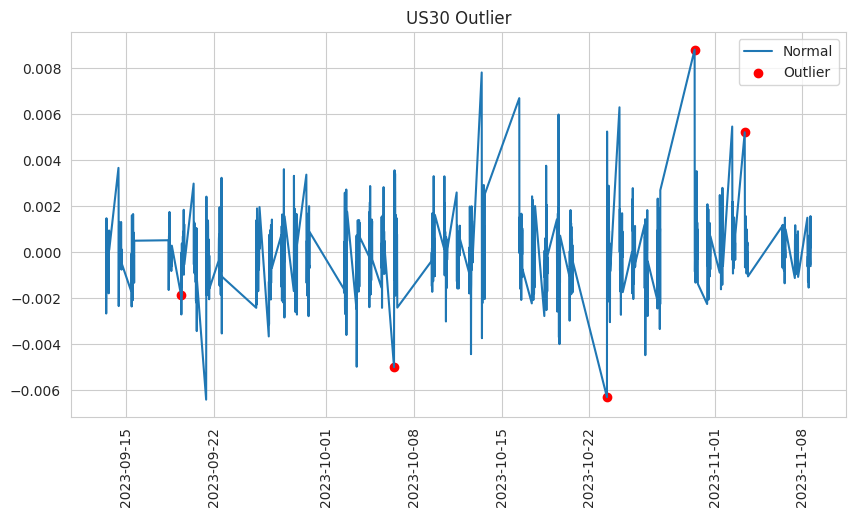

In [68]:
plt.figure(figsize=(10,5))
plt.plot(df_outliers.index, df_outliers['Rets'], label="Normal")
plt.scatter(outliers.index, outliers['Rets'], label="Outlier", color='red')
plt.xticks(rotation=90)
plt.title("US30 Outlier")
plt.legend()
plt.show()